<img src="figuras/mbit-logo.png" align="right" style="float" width="200">
<font color="#CA3532"><h1 align="left">Clustering</h1></font>
<h2 align="left">Clustering jerárquico en dataset de vinos</h2>

In [1]:
COLAB = True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics

Now we will use clustering in a wine database. The goal is to check if the clustering discovers the different real wine types.

The database describes the parameters of different wine instances. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [3]:
if COLAB:
    !mkdir datasets
    aux = "'https://docs.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR&confirm=t'"
    !wget $aux -O ./datasets/wine_dataset.csv

data = pd.read_csv('datasets/wine_dataset.csv', delimiter=';', header=0)

print('Wine Database\n')
print('Number of real classes (wine types):', np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst instances:')
data.head()

--2023-11-04 10:54:44--  https://docs.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR&confirm=t
Resolving docs.google.com (docs.google.com)... 172.253.63.138, 172.253.63.101, 172.253.63.113, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vnujcjlrea7e7ch1t7l7kp4biadtve8d/1699095225000/17112108692206476645/*/1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR?e=download&uuid=6cacde65-86d4-418d-85e0-1277424f8e0e [following]
--2023-11-04 10:54:44--  https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vnujcjlrea7e7ch1t7l7kp4biadtve8d/1699095225000/17112108692206476645/*/1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR?e=download&uuid=6cacde65-86d4-418d-85e0-1277424f8e0e
Resolving doc-0k-8k-docs.googleusercontent.com (doc-0k-8k-docs.googleusercontent.com)... 172.253.63.132, 

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
Alcohol,178.0,11.03,14.83,13.000618,0.811827
Malic_Acid,178.0,0.74,5.80,2.336348,1.117146
Ash,178.0,1.36,3.23,2.366517,0.274344
Ash_Alcalinity,178.0,10.60,30.00,19.494944,3.339564
Magnesium,178.0,70.00,162.00,99.741573,14.282484
Total_Phenols,178.0,0.98,3.88,2.295112,0.625851
Flavanoids,178.0,0.34,5.08,2.029270,0.998859
Nonflavanoid_Phenols,178.0,0.13,0.66,0.361854,0.124453
Proanthocyanins,178.0,0.41,3.58,1.590899,0.572359
Color_Intensity,178.0,1.28,13.00,5.058090,2.318286


After loading the database we need to do some basic preprocessing: standarization and PCA:

In [5]:
X = data.drop("Type", axis=1)
y = data["Type"]

classes_names = data['Type'].unique()
print(classes_names)
attribute_names = X.columns
print(attribute_names)

['A' 'B' 'C']
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')


Now we will perform clustering using a hierarchical strategy:


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Now we will analyze the wine dataset with hierarchical clustering

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=5)
pca.fit(X_std)
X_pca = pca.transform(X_std)
#X_clust = X_std
X_clust = X_pca

#from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

#dists = 1 - cosine_similarity(infoMat_analysis)
from scipy.spatial.distance import pdist
dists = pairwise_distances(X_clust, metric='euclidean')
dists = pdist(X_clust, metric='euclidean')

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dists)

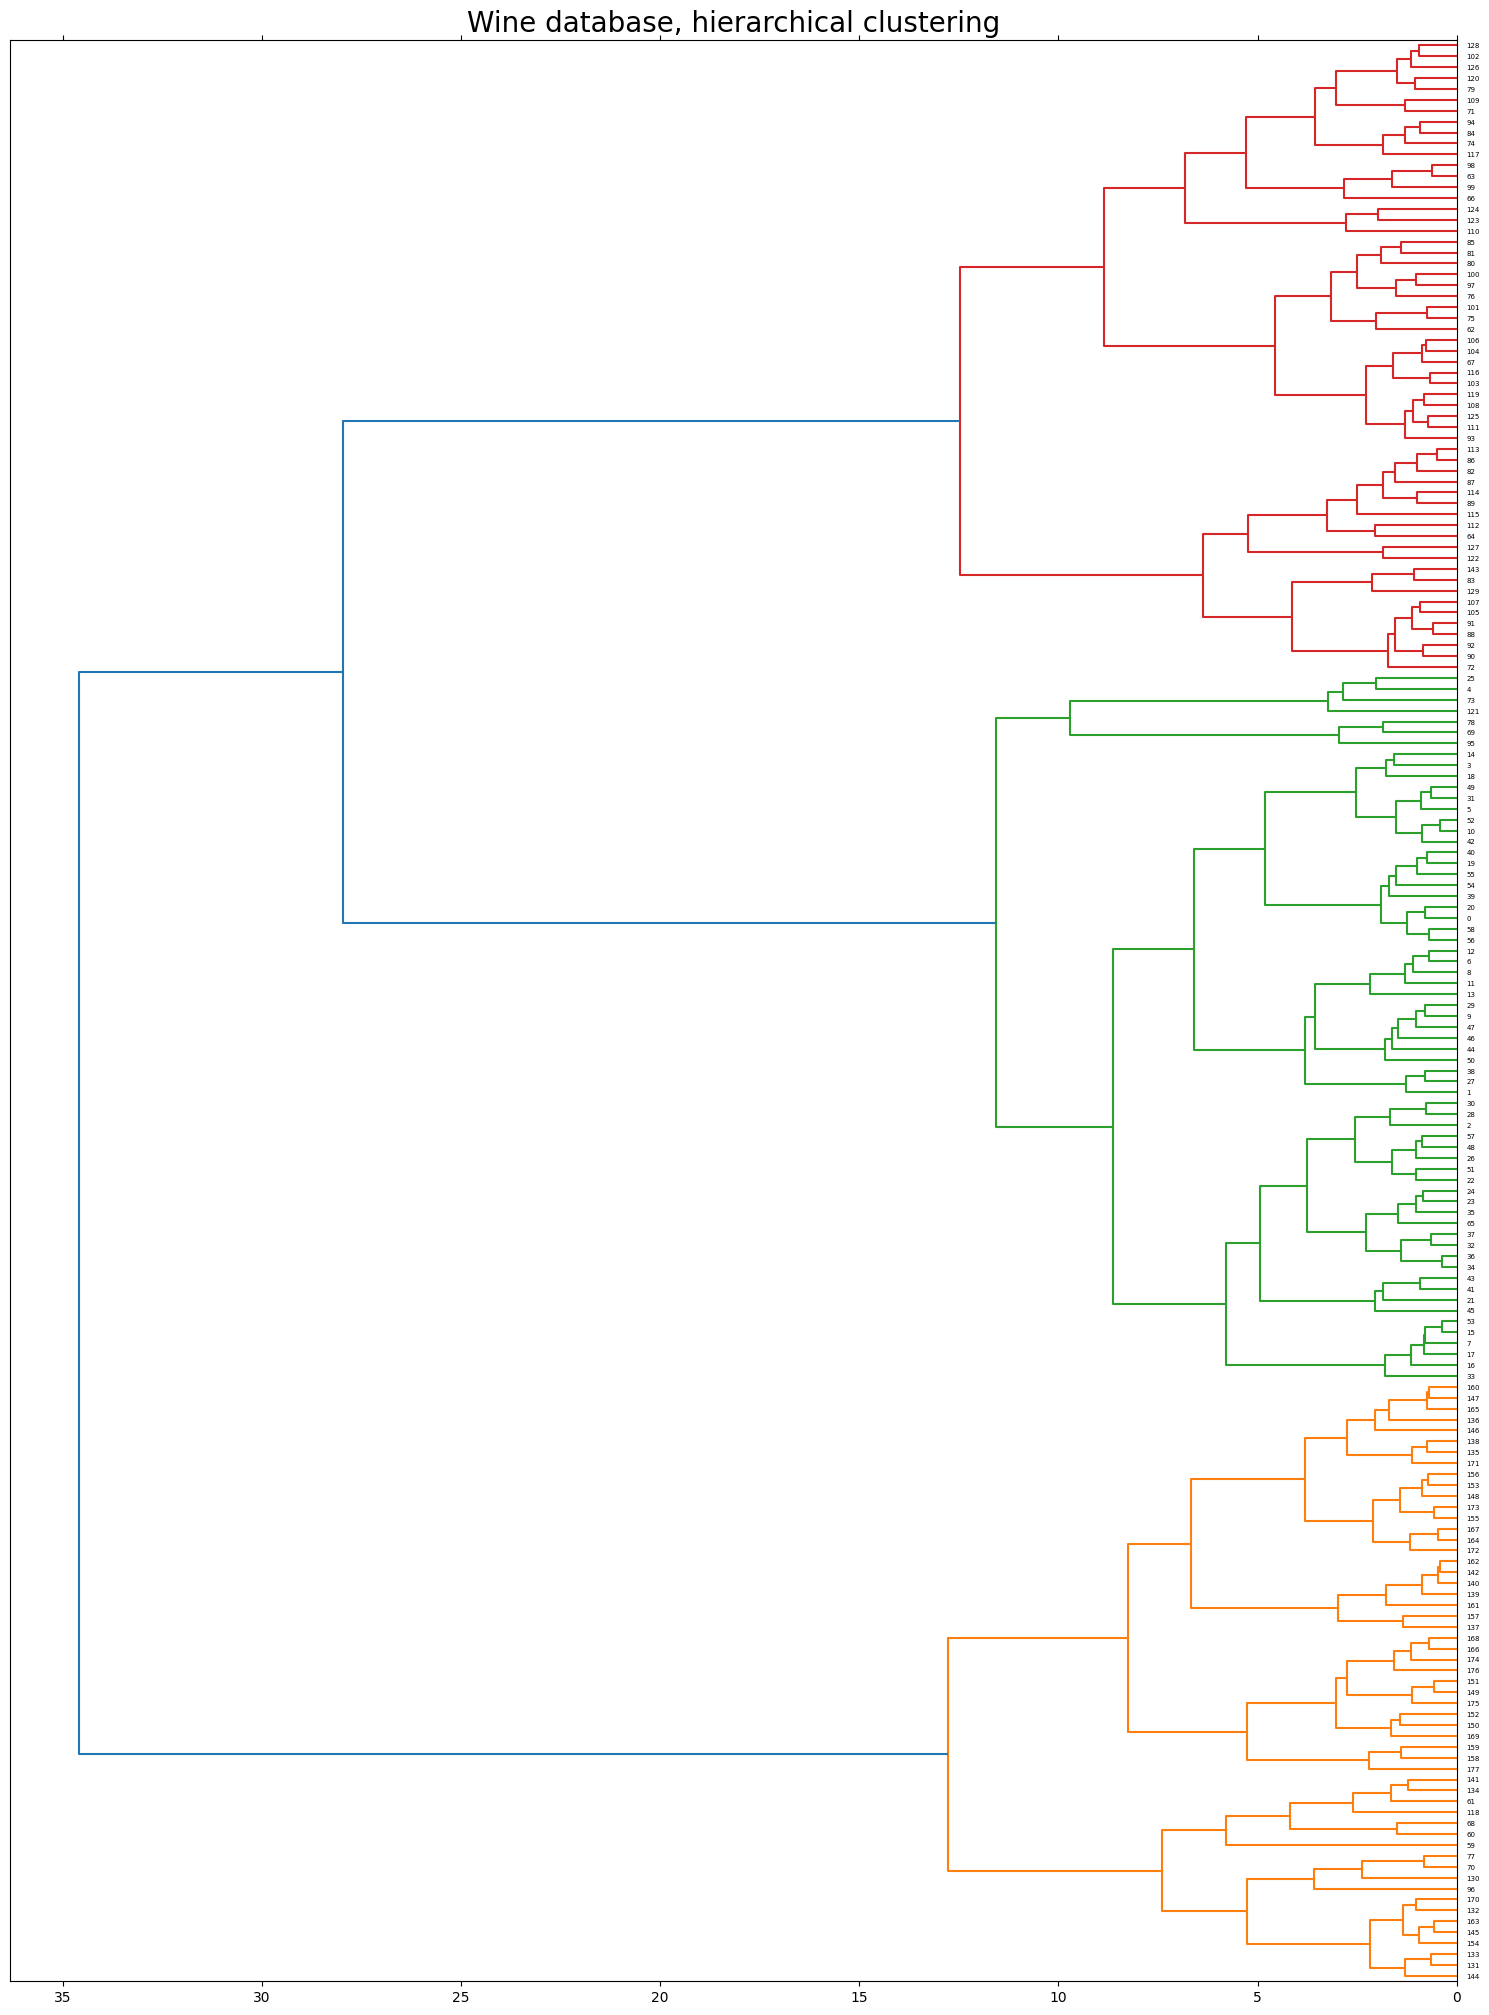

- Cluster 0
  Number of patterns with real class A: 0
  Number of patterns with real class B: 8
  Number of patterns with real class C: 47

- Cluster 1
  Number of patterns with real class A: 59
  Number of patterns with real class B: 6
  Number of patterns with real class C: 0

- Cluster 2
  Number of patterns with real class A: 0
  Number of patterns with real class B: 57
  Number of patterns with real class C: 1



In [7]:
fig, ax = plt.subplots(figsize=(15,20))
#dendr = dendrogram(linkage_matrix, orientation="left", labels=names)
dendr = dendrogram(linkage_matrix, orientation="left")

inds_leaves = dendr['leaves']

plt.tick_params(\
               axis = 'x',
                which = 'both',
                bottom = 'off',
                top = 'off',
                labelbottom = 'off')
plt.tight_layout()
plt.title('Wine database, hierarchical clustering', fontsize = 20)
plt.show()

from scipy.cluster.hierarchy import fcluster

nselected_clusters = 3
ids_clusters = fcluster(linkage_matrix, nselected_clusters, criterion='maxclust')-1

unique_y = np.unique(y)
for c in np.unique(ids_clusters):
    inds = (np.where(np.array(ids_clusters) == c))[0]
    print('- Cluster %d' % c)
    for real_class in unique_y:
        print('  Number of patterns with real class %c: %d' % (real_class, (list(y[inds])).count(real_class)))
    print()

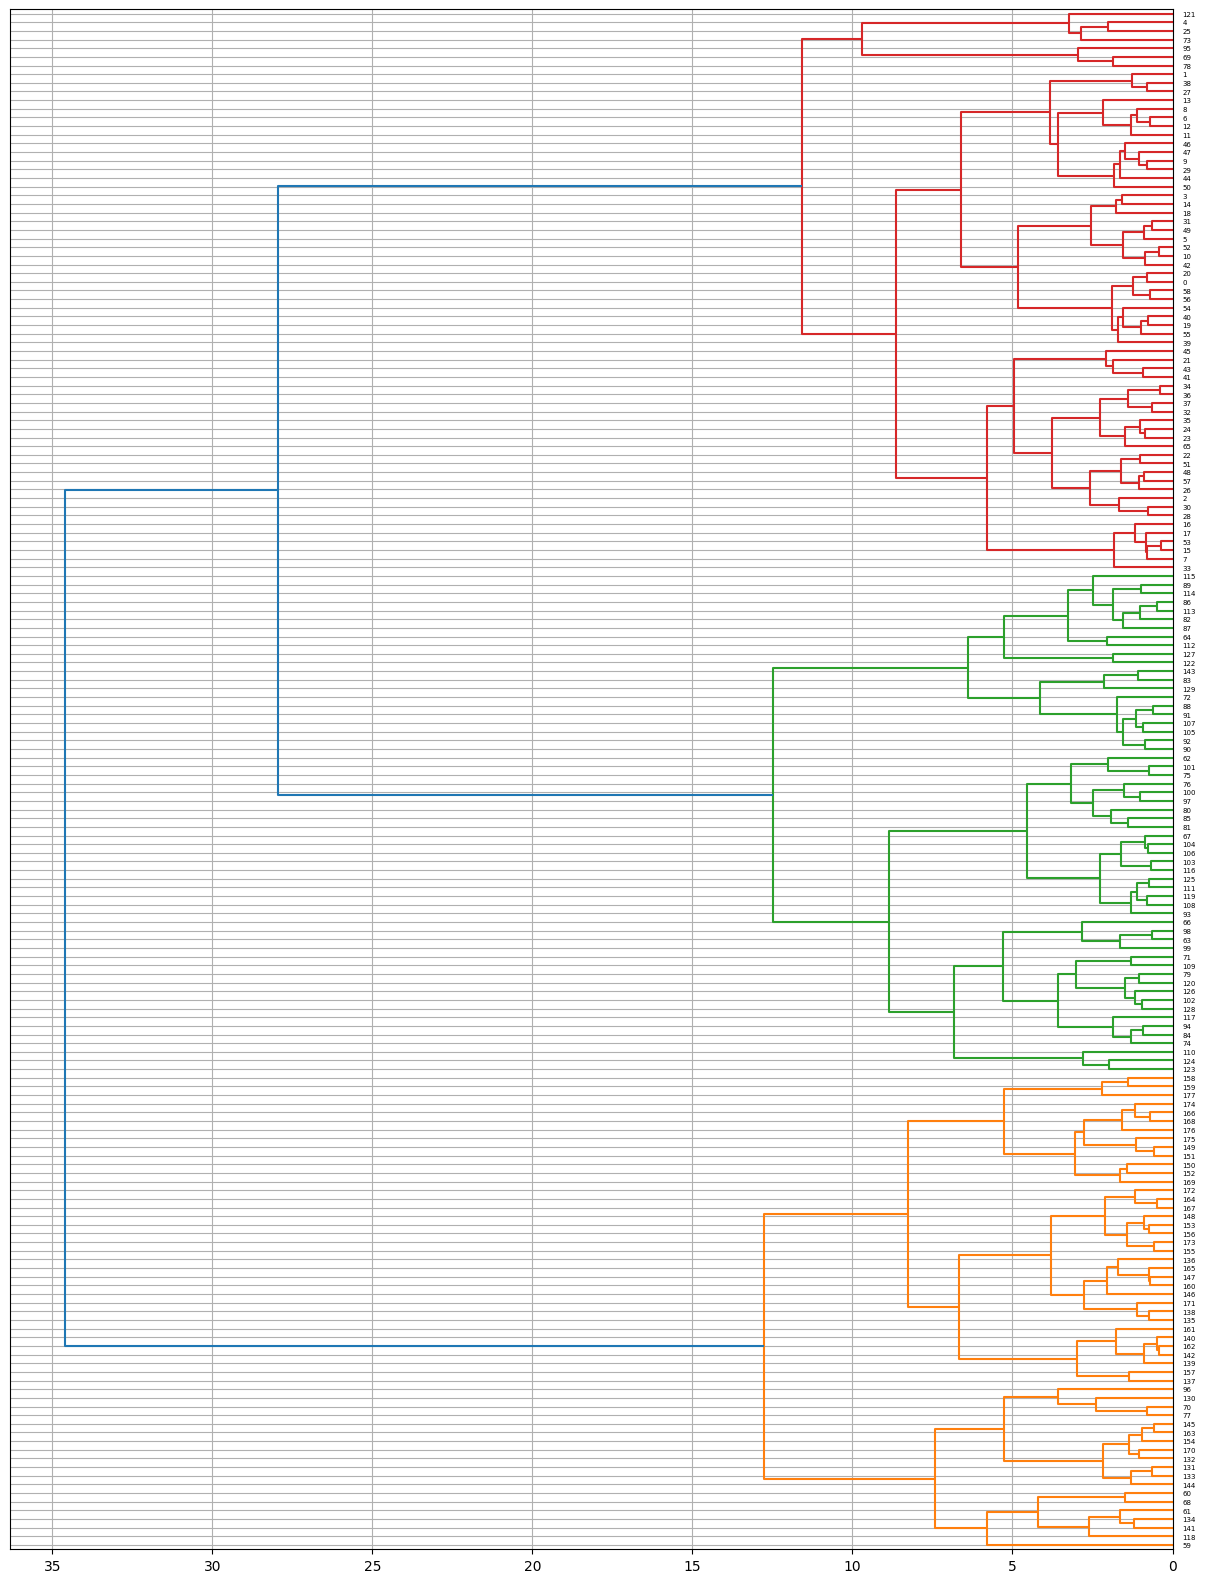

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# ward, complete
Z = linkage(X_clust, 'ward', optimal_ordering=True) # single, complete, average

# Plot the dendrogram:
plt.figure(figsize=(15, 20))
dendrogram(Z, leaf_rotation=0, orientation='left')
plt.grid(True)

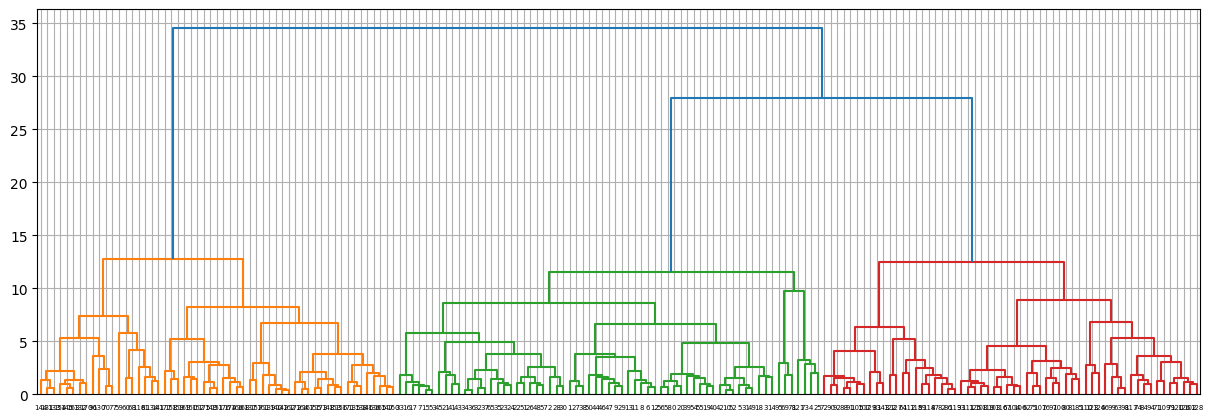

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X_clust, 'ward') # ward, single, complete, average

# Plot the dendrogram:
plt.figure(figsize=(15, 5))
dendrogram(Z, leaf_rotation=0)
plt.grid(True)

In [10]:
nselected_clusters = 3
ids_clusters = fcluster(Z, nselected_clusters, criterion='maxclust')-1

unique_y = np.unique(y)
for c in np.unique(ids_clusters):
    inds = (np.where(np.array(ids_clusters) == c))[0]
    print('- Cluster %d' % c)
    for real_class in unique_y:
        print('  Number of patterns with real class %c: %d' % (real_class, (list(y[inds])).count(real_class)))
    print()

- Cluster 0
  Number of patterns with real class A: 0
  Number of patterns with real class B: 8
  Number of patterns with real class C: 47

- Cluster 1
  Number of patterns with real class A: 59
  Number of patterns with real class B: 6
  Number of patterns with real class C: 0

- Cluster 2
  Number of patterns with real class A: 0
  Number of patterns with real class B: 57
  Number of patterns with real class C: 1



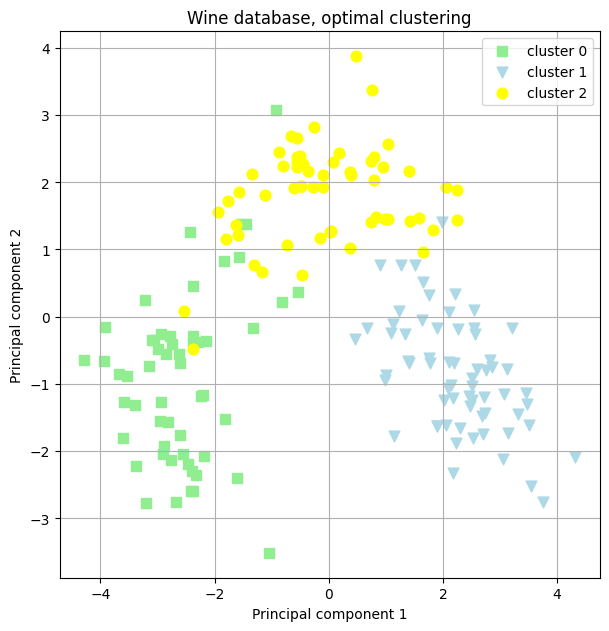

In [11]:
pcx = 0
pcy = 1

fig = plt.figure(figsize=(6,6))
colors = ['lightgreen', 'lightblue', 'yellow', 'orange', 'magenta']
markers = ['s', 'v', 'o', 'd', 's']

for c in range(nselected_clusters):
    inds = np.where(ids_clusters == c)[0]
    plt.scatter(X_pca[inds, 0],
                X_pca[inds, 1],
                s = 60,
                c = colors[c], marker = markers[c],
                label = 'cluster %d' % (c))

plt.legend()
plt.grid()
plt.tight_layout()
plt.title('Wine database, optimal clustering')
plt.xlabel('Principal component '+str(pcx+1))
plt.ylabel('Principal component '+str(pcy+1))
plt.show()

### Finding automatically the number of clusters

In [12]:
#from sklearn.metrics import silhouette_score as qmetric
from sklearn.metrics import calinski_harabasz_score as qmetric

Nclusters_max = 15

qualities = []
labels_sets = []
for k in range(1,Nclusters_max+1):
    labels = fcluster(Z, k, criterion='maxclust')
    labels_sets.append(labels)
    if k >1:
        qualities.append(qmetric(X_clust, labels))
    else:
        qualities.append(0)

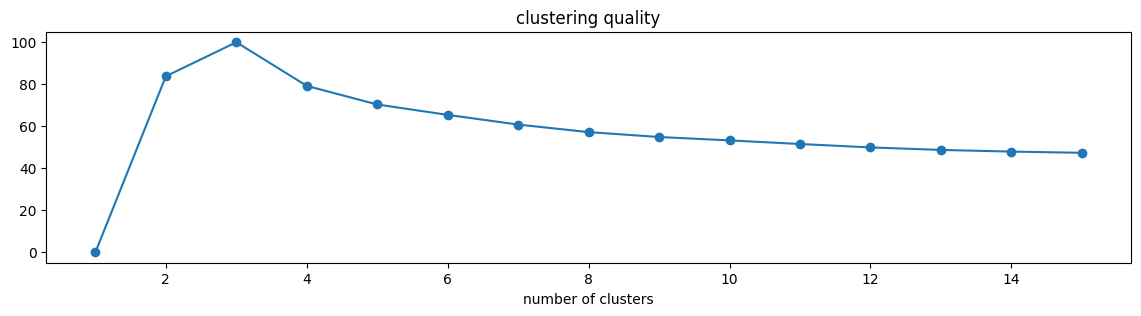

In [13]:
fig = plt.figure(figsize=(14,3))

plt.plot(range(1,Nclusters_max+1), qualities, marker='o')
plt.xlabel('number of clusters')
plt.title('clustering quality')
plt.show()

best = pd.Series(qualities).idxmax() # get index for the best model
labels = labels_sets[best]
n_clusters = len(np.unique(labels))